```
python reuse_exploration.py --workers=4000 --experiments=5 --outfile=reuse_explore.manyjobs.pickle --eta=1.0 --sleep=60.0
```

In [1]:
%pylab inline
import uuid
import base64
import cPickle as pickle
import seaborn as sns
import pandas as pd
sns.set_style('whitegrid')
import os

Populating the interactive namespace from numpy and matplotlib


In [8]:
data = pickle.load(open("reuse_explore.manyjobs.pickle", 'r'))



In [9]:
res = []
for d in data:
    invoke_df = pd.DataFrame(d['results'])
    results_df = pd.DataFrame(d['run_statuses'])
    results_df = pd.concat([results_df, invoke_df], axis=1)
    results_df['exp_i'] = d['exp_i']
    res.append(results_df)

In [13]:
allres_df = pd.concat(res)
allres_df['call_id'] = allres_df.call_id.astype(int)

In [14]:
allres_df.dtypes

aws_request_id       object
call_id               int64
callset_id           object
data_key             object
end_time            float64
exec_time           float64
func_key             object
host_submit_time    float64
log_group_name       object
log_stream_name      object
output_key           object
runtime_cached         bool
server_info          object
setup_time          float64
start_time          float64
status_key           object
stdout               object
hw_addr              object
ntp_offsets          object
uptime              float64
exp_i                 int64
dtype: object

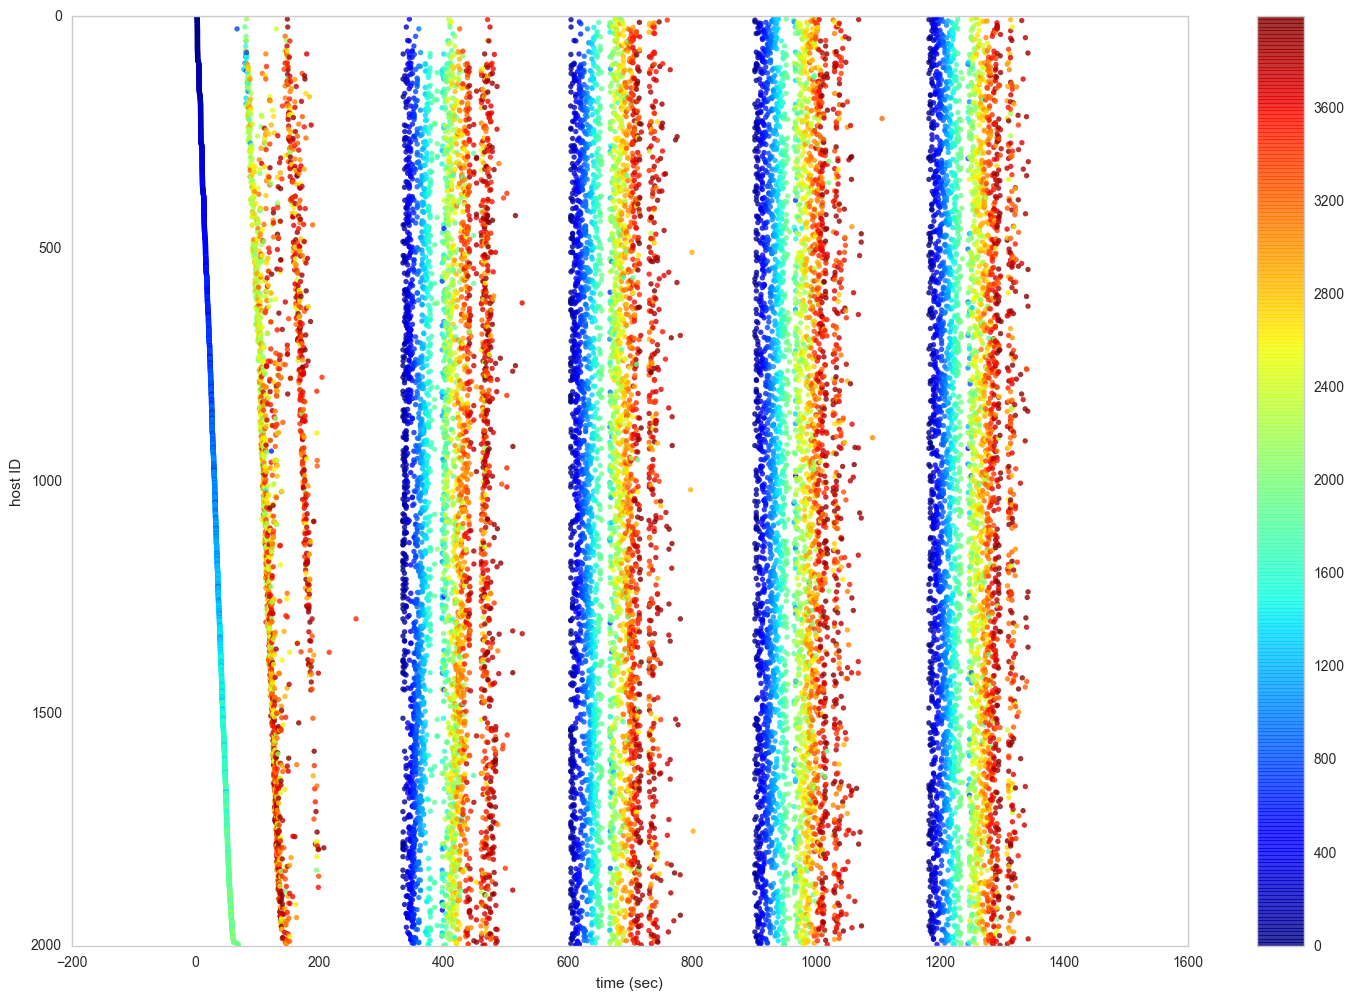

In [28]:
# timeline
min_time = np.min(allres_df.start_time) -2
s = allres_df.sort_values('start_time')
# create map 
list_of_hw_addr = s['hw_addr'].unique()
HOSTN = len(list_of_hw_addr)
hw_to_pos = {h : i for i, h in enumerate(list_of_hw_addr)}
s['hw_pos'] = s['hw_addr'].apply(lambda x: hw_to_pos[x])

point_size = 30e3/HOSTN
fig = pylab.figure(figsize=(18, 12))
ax = fig.add_subplot(1, 1, 1)
sc =ax.scatter(s['start_time'] - min_time, s.hw_pos, c=s.call_id, 
           s=point_size, edgecolor='none', cmap=pylab.cm.jet, alpha=0.8)
ax.grid()
ax.set_xlabel("time (sec)")
if HOSTN < 50:
    ax.set_yticks(range(len(list_of_hw_addr)))
    ax.set_yticklabels(list_of_hw_addr, fontsize=5,
                       fontname='Bitstream Vera Sans Mono')
#for i in range(len(list_of_hw_addr)):
#    ax.axhline(i, c='k', alpha=0.1, linewidth=0.5)
ax.set_ylim(len(list_of_hw_addr)+1, -1)
ax.set_ylabel("host ID")


plt.colorbar(sc)

#import matplotlib.patches as mpatches

#cached_patch = mpatches.Patch(color='k', label='runtime cached')
#uncached_patch = mpatches.Patch(color='w', label='runtime uncached')

#legend = pylab.legend(handles=[cached_patch, uncached_patch, ],
#                      loc='lower left', frameon=True)
